# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [12]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers.csv'

#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.drop(columns= "CustomerID", inplace=True)

In [ ]:
df.head()

In [ ]:
df.nunique()

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);


In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);


In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);


In [ ]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [ ]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

# stripplot : kategorik verilerin yoğunluğuna bakmak için kullanılır.

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()


In [5]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

NameError: name 'df' is not defined

<Figure size 1500x500 with 0 Axes>

In [ ]:
sns.pairplot(df)


In [ ]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

### Clustering based on Age and Spending Score 

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
df_2 = df.drop(columns="Gender")
df_2


In [ ]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]



In [ ]:
hopkins(df_2, df_2.shape[0])

In [ ]:
X_age_ss = df.loc[:,['Age','Spending_Score']]
X_age_ss

In [ ]:
hopkins(X_age_ss, X_age_ss.shape[0])

#### *ii. Determine optimal number of clusters*

In [ ]:
sns.pairplot(X_age_ss)


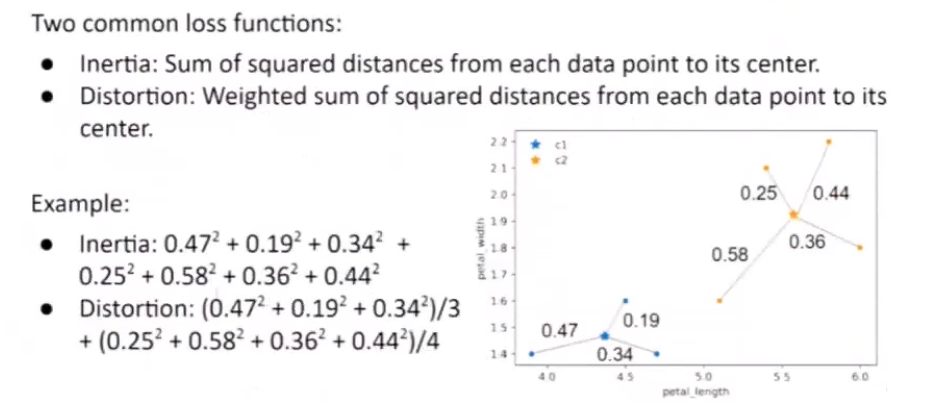

### inertia

In [ ]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X_age_ss)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
ssd

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

### distortion

In [ ]:
K=range(2,10)
distortion=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k,
                        random_state=42)
    kmeanModel.fit(X_age_ss)

    distances = kmeanModel.transform(X_age_ss) 
    labels_ = kmeanModel.labels_ 

    result = []
    for i in range(k):
        cluster_distances = distances[labels_ == i, i] 
        result.append(np.mean(cluster_distances**2))
                                                 
    distortion.append(sum(result)) 
                                   

In [ ]:
plt.plot(K, distortion, "bo-")
plt.xlabel("Different k values")
plt.ylabel("distortion") 
plt.title("elbow method")

### silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_age_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_age_ss)    
visualizer.poof();

In [ ]:
model3.n_clusters

In [ ]:
#model3.n_clusters

for i in range(model3.n_clusters):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

### Why silhouette_score is negative?

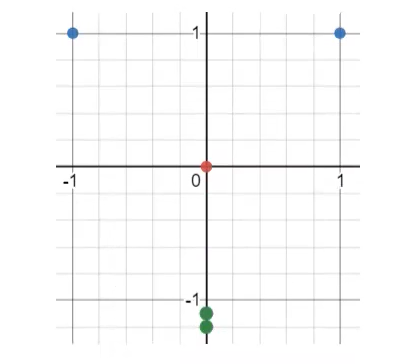

https://stackoverflow.com/questions/63639841/how-can-silhouette-scores-be-negative

#### *iii. Apply K Means*

In [6]:
kmeans = KMeans(n_clusters = 4, random_state=42)

NameError: name 'KMeans' is not defined

In [ ]:
kmeans.fit_predict(X_age_ss)

In [ ]:
df_age_ss = X_age_ss.copy()
df_age_ss


In [ ]:
df_age_ss["cluster_Kmeans"] = kmeans.fit_predict(X_age_ss) 


In [ ]:
df_age_ss

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=df_age_ss, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)


### Clustering based on Annual Income and Spending Score 

#### *i. Create a new dataset with two variables of your choice*

In [7]:
X_ai_ss = df[['Annual_Income','Spending_Score']]
X_ai_ss.head()

NameError: name 'df' is not defined

In [ ]:
hopkins(X_ai_ss, X_ai_ss.shape[0])

#### *ii. Determine optimal number of clusters*

In [ ]:
sns.pairplot(X_ai_ss)

### inertia

In [ ]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_ai_ss)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

### distortion

In [ ]:
K=range(2,10)
distortion=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k,
                        random_state=42)
    kmeanModel.fit(X_ai_ss)

    distances = kmeanModel.transform(X_ai_ss) 
    labels_ = kmeanModel.labels_ 

    result = []
    for i in range(k):
        cluster_distances = distances[labels_ == i, i] 
        result.append(np.mean(cluster_distances**2))
                                                    
    distortion.append(sum(result))
                                

In [ ]:
plt.plot(K, distortion, "bo-")
plt.xlabel("Different k values")
plt.ylabel("distortion") 
plt.title("elbow method")

### silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_ai_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [ ]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X_ai_ss)    # Fit the data to the visualizer
visualizer.poof();

In [ ]:
#model3.n_clusters

for i in range(model4.n_clusters):
    label = (model4.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

#### *iii. Apply K Means*

In [8]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X_ai_ss)

NameError: name 'KMeans' is not defined

In [ ]:
df_ai_ss = X_ai_ss.copy()
df_ai_ss.head()

In [ ]:
df_ai_ss['cluster_Kmeans'] = kmeans2.fit_predict(X_ai_ss) #kmeans2.labels_
df_ai_ss

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=df_ai_ss, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score

In [ ]:
X_age_ss

In [ ]:
from scipy.cluster.hierarchy import linkage



In [9]:
hc_ward = linkage(y = X_age_ss, method = "ward")                        
hc_complete = linkage(X_age_ss, "complete")
hc_average = linkage(X_age_ss, "average")
hc_single = linkage(X_age_ss, "single")

NameError: name 'linkage' is not defined

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10,  leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10,  leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10,  leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10,  leaf_font_size = 10);

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_age_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

## Clustering based on Annual Income and Spending Score

In [ ]:
X_ai_ss

In [ ]:
hc_ward = linkage(y = X_ai_ss, method = "ward")
hc_complete = linkage(X_ai_ss, "complete")
hc_average = linkage(X_ai_ss, "average")
hc_single = linkage(X_ai_ss, "single")

NameError: name 'dendrogram' is not defined

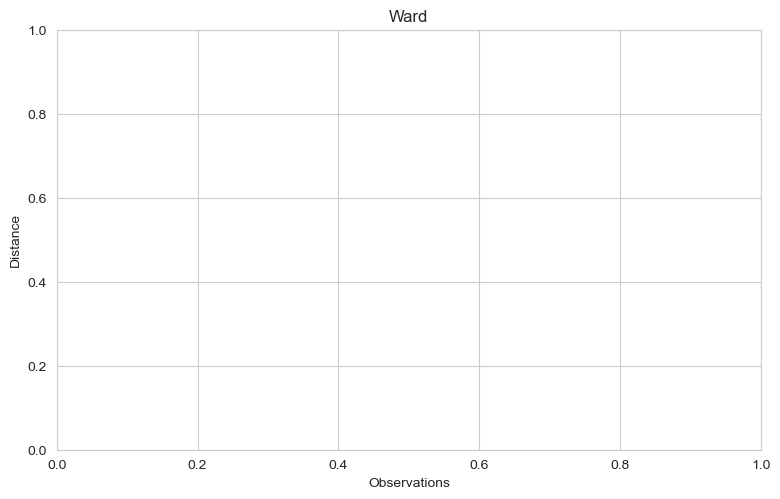

In [11]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10,  leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10,  leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10,  leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10,  leaf_font_size = 10);

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_ai_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_ai_ss, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score

In [ ]:
X_age_ss

In [ ]:
Agg1 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X_age_ss)                

In [ ]:
df_age_ss

In [ ]:
df_age_ss['cluster_Agg'] = y_agg
df_age_ss.head()

#### Annual Income and Spending Score

In [ ]:
X_ai_ss

In [ ]:
Agg2 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X_ai_ss)

In [ ]:
df_ai_ss

In [ ]:
df_ai_ss['cluster_Agg'] = y_agg2
df_ai_ss.head()

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score

In [ ]:
df_age_ss

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=df_age_ss, palette="bright")

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=df_age_ss, palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=df_age_ss, palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")

#### Annual Income and Spending Score

In [ ]:
df_ai_ss

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df_ai_ss ,palette="bright")

In [ ]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=df_ai_ss, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df_ai_ss, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score

In [ ]:
df_age_ss

In [ ]:
df_age_ss.cluster_Kmeans.value_counts()

In [ ]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [ ]:
df.head()

In [ ]:
df["cluster_Age_Spending_Score"] = df_age_ss.cluster_Kmeans
df.head()


In [ ]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)


In [ ]:
df.groupby("cluster_Age_Spending_Score").mean()

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df)

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df)

In [ ]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")


### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score

In [ ]:
df_ai_ss

In [ ]:
df_ai_ss.cluster_Kmeans.value_counts()

In [ ]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_ss.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [ ]:
df.head()

In [ ]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [ ]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss.cluster_Kmeans
df.head()

In [ ]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()


In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

In [ ]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

In [ ]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.